In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
%matplotlib inline
#from keplergl import KeplerGl

In [2]:
data = pd.read_csv('seoul.csv')
data.drop('Unnamed: 0',inplace=True,axis=1)

In [3]:
data.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,11,1800,37.525650,126.887817,37.535961,126.898300,1.472768,1,1,0,...,17,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,14,2280,37.554859,126.936157,37.549904,126.955147,1.762402,1,1,0,...,31,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,13,2160,37.531860,127.067192,37.539654,127.052589,1.552109,1,1,0,...,32,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,20,5250,37.484661,126.903900,37.507332,126.879730,3.301778,1,1,0,...,42,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,3,630,37.479916,126.902840,37.483192,126.902031,0.371204,1,1,0,...,26,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


<AxesSubplot:>

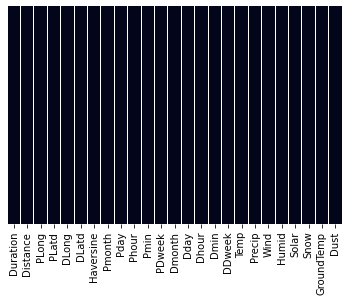

In [4]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [5]:
data.isnull().sum()

Duration      0
Distance      0
PLong         0
PLatd         0
DLong         0
DLatd         0
Haversine     0
Pmonth        0
Pday          0
Phour         0
Pmin          0
PDweek        0
Dmonth        0
Dday          0
Dhour         0
Dmin          0
DDweek        0
Temp          0
Precip        0
Wind          0
Humid         0
Solar         0
Snow          0
GroundTemp    0
Dust          0
dtype: int64

In [6]:
data.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,...,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000
mean,25.812175,3715.180116,37.547578,126.990816,37.547683,126.990730,1.873103,7.580550,15.777236,14.369712,...,30.039917,2.944789,18.561617,0.017755,1.819308,53.989488,0.728809,0.010117,20.711738,32.438019
std,25.051994,3956.765453,0.044371,0.082604,0.044425,0.083257,1.999728,2.695441,8.751177,6.257666,...,17.311234,1.977370,9.492859,0.366605,0.972092,17.420867,0.916196,0.166662,12.639915,24.061568
min,1.000000,1.000000,37.437271,126.798599,37.437271,126.798599,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,-17.800000,0.000000,0.000000,10.000000,0.000000,0.000000,-13.600000,0.000000
25%,8.000000,1230.000000,37.514240,126.920036,37.514240,126.919395,0.674016,6.000000,8.000000,10.000000,...,15.000000,1.000000,12.200000,0.000000,1.100000,41.000000,0.000000,0.000000,11.600000,16.000000
50%,16.000000,2280.000000,37.546848,126.994293,37.546547,126.994682,1.258996,8.000000,16.000000,16.000000,...,30.000000,3.000000,20.100000,0.000000,1.700000,53.000000,0.270000,0.000000,21.100000,27.000000
75%,36.000000,4620.000000,37.573242,127.061897,37.573242,127.062752,2.368855,10.000000,23.000000,19.000000,...,45.000000,5.000000,25.500000,0.000000,2.400000,67.000000,1.260000,0.000000,28.500000,42.000000
max,119.000000,33290.000000,37.689720,127.180267,37.689720,127.180267,28.634480,12.000000,31.000000,23.000000,...,59.000000,6.000000,39.400000,35.000000,7.400000,98.000000,3.520000,8.800000,62.200000,304.000000


In [7]:
data.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

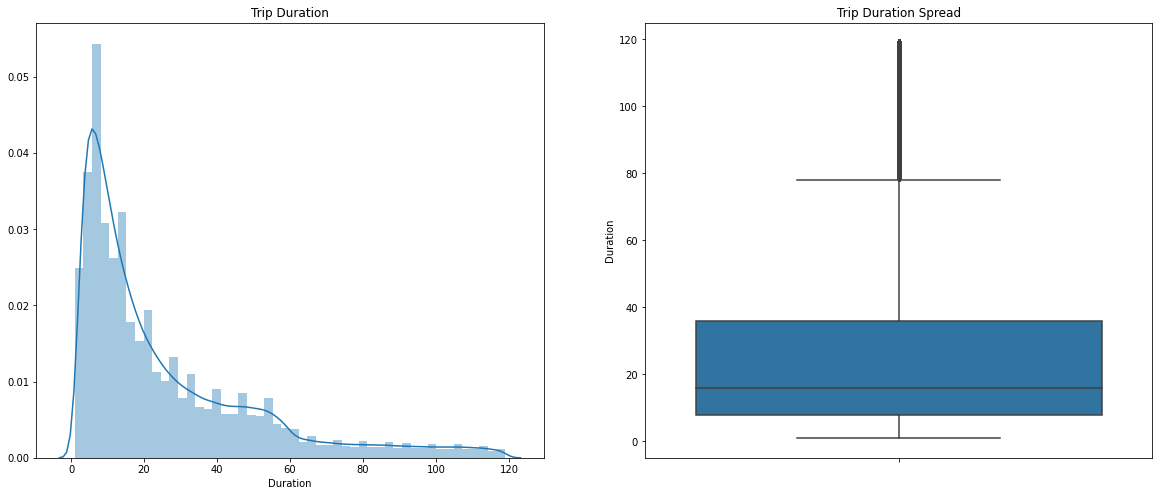

In [8]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Trip Duration")
sns.distplot(data.Duration)

plt.subplot(1,2,2)
plt.title('Trip Duration Spread')
sns.boxplot(y=data.Duration)

plt.show()

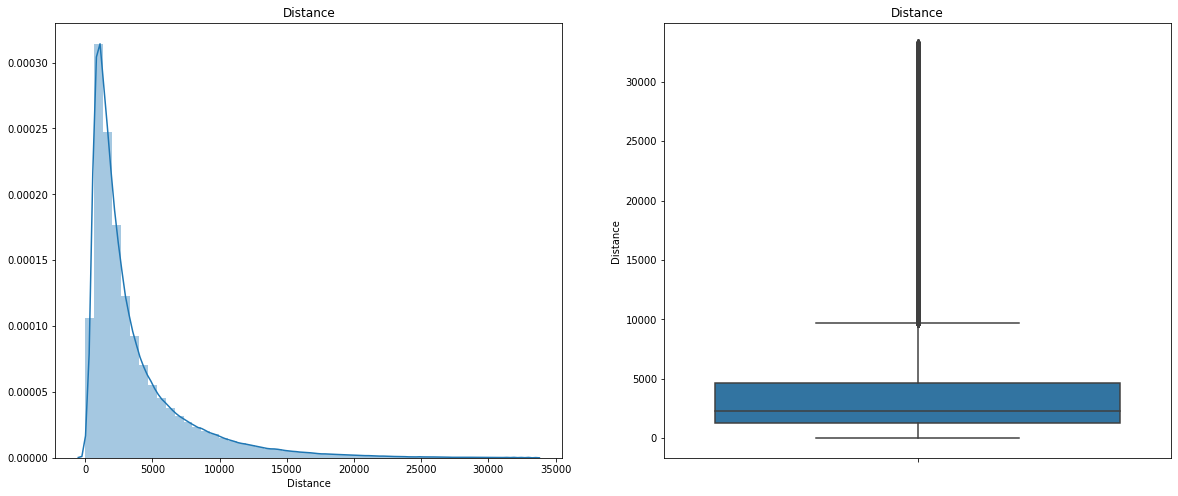

In [9]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Distance")
sns.distplot(data.Distance)

plt.subplot(1,2,2)
plt.title('Distance')
sns.boxplot(y=data.Distance)

plt.show()

<AxesSubplot:title={'center':'Distance'}, xlabel='Distance'>

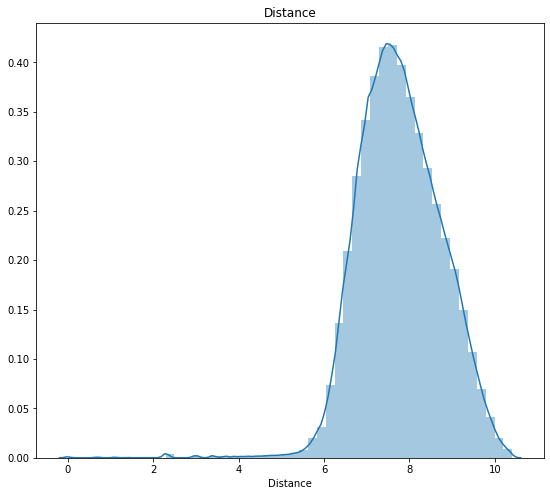

In [10]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Distance")
sns.distplot(np.log(data.Distance))

<AxesSubplot:title={'center':'Trip Duration'}, xlabel='Duration'>

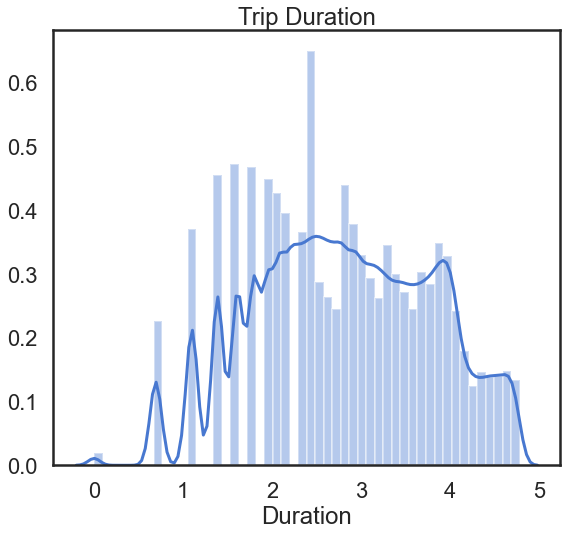

In [43]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Trip Duration")
sns.distplot(np.log(data.Duration))

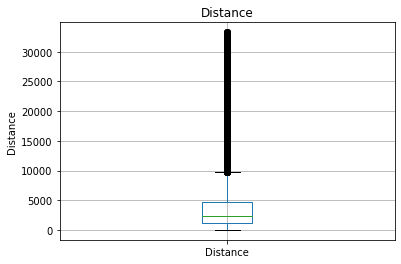

In [11]:
data.boxplot(column='Distance')
plt.ylabel('Distance')
plt.title('Distance')
plt.show()

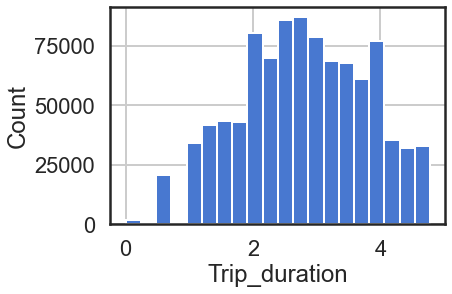

In [47]:
np.log(data['Duration']).hist(bins=20)
plt.xlabel('Trip_duration')
plt.ylabel("Count")

#xticks(rotation = 90)

plt.show()

In [48]:
data.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,11,1800,37.525650,126.887817,37.535961,126.898300,1.472768,1,1,0,...,17,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,14,2280,37.554859,126.936157,37.549904,126.955147,1.762402,1,1,0,...,31,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,13,2160,37.531860,127.067192,37.539654,127.052589,1.552109,1,1,0,...,32,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,20,5250,37.484661,126.903900,37.507332,126.879730,3.301778,1,1,0,...,42,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,3,630,37.479916,126.902840,37.483192,126.902031,0.371204,1,1,0,...,26,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960113 entries, 0 to 960112
Data columns (total 25 columns):
Duration      960113 non-null int64
Distance      960113 non-null int64
PLong         960113 non-null float64
PLatd         960113 non-null float64
DLong         960113 non-null float64
DLatd         960113 non-null float64
Haversine     960113 non-null float64
Pmonth        960113 non-null int64
Pday          960113 non-null int64
Phour         960113 non-null int64
Pmin          960113 non-null int64
PDweek        960113 non-null int64
Dmonth        960113 non-null int64
Dday          960113 non-null int64
Dhour         960113 non-null int64
Dmin          960113 non-null int64
DDweek        960113 non-null int64
Temp          960113 non-null float64
Precip        960113 non-null float64
Wind          960113 non-null float64
Humid         960113 non-null float64
Solar         960113 non-null float64
Snow          960113 non-null float64
GroundTemp    960113 non-null float64
D

In [15]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
len(cat_vars)

0

In [16]:
num_vars = [
    var for var in data.columns if var not in cat_vars and var != 'Duration'
]
len(num_vars)

24

In [17]:
len(data.columns)

25

In [18]:
continuous_feature = ['Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust']

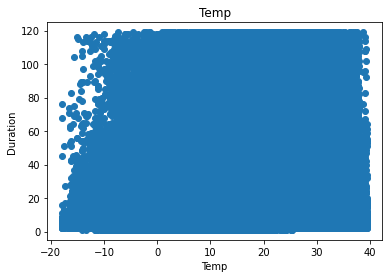

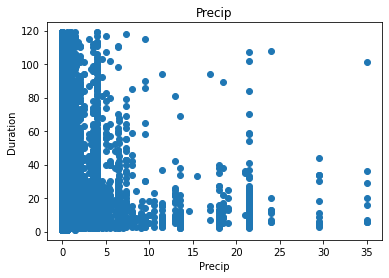

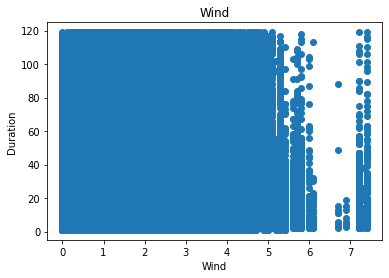

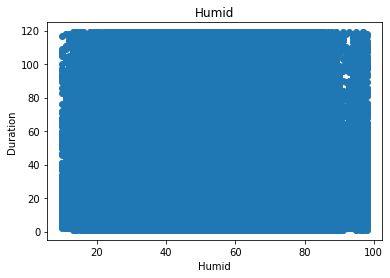

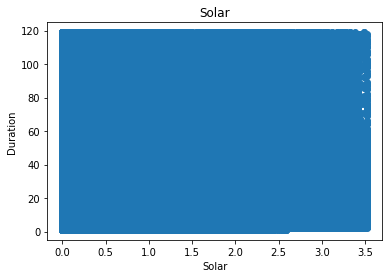

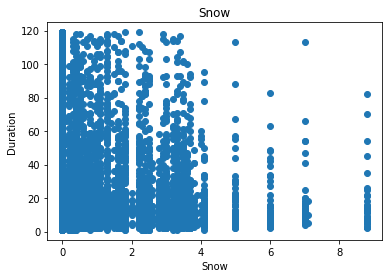

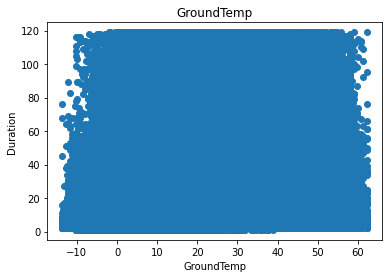

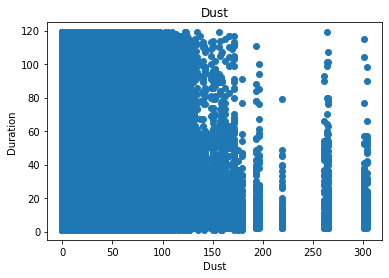

In [19]:
for feature in continuous_feature:

    data[feature]= data[feature].astype('float64')
    #data['Duration']=data['Duration'].astype('float64')
    plt.scatter(data[feature],data['Duration'])
    plt.xlabel(feature)
    plt.ylabel('Duration')
    plt.title(feature)
    plt.show()

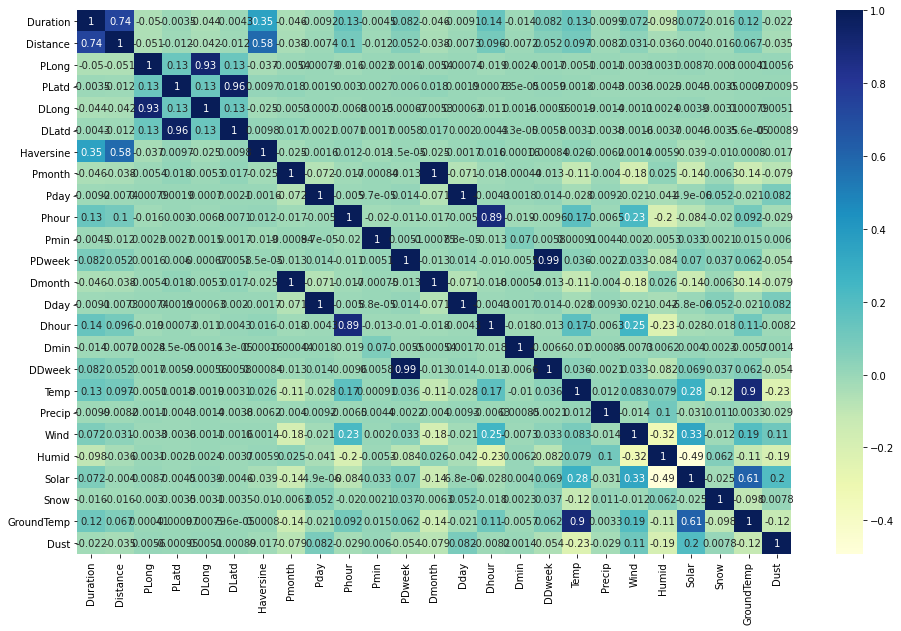

In [20]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [21]:
data['Pday'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [22]:
data['Dday'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

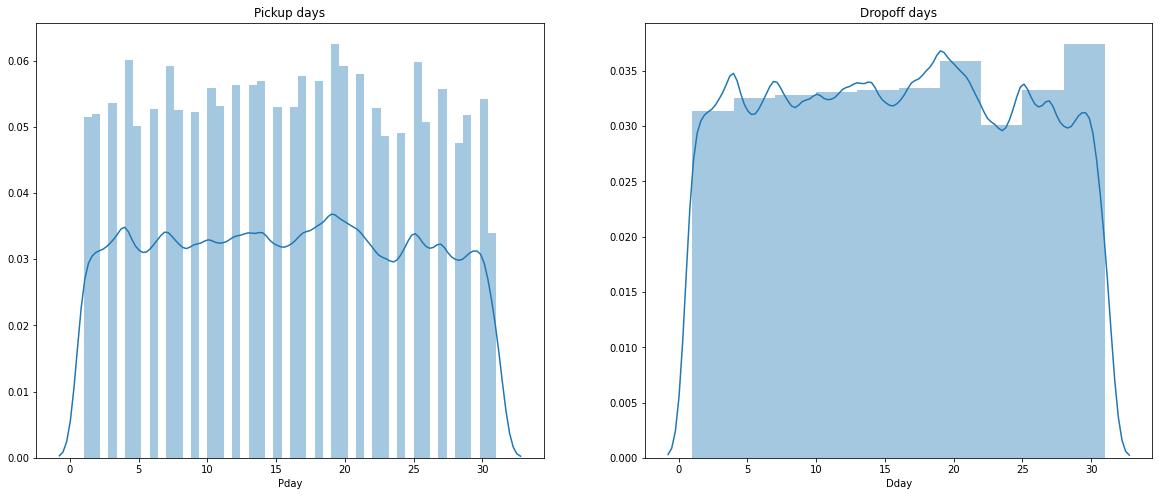

In [23]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Pickup days")
sns.distplot(data.Pday)

plt.subplot(1,2,2)
plt.title('Dropoff days')
sns.distplot(data.Dday,bins=10)

plt.show()

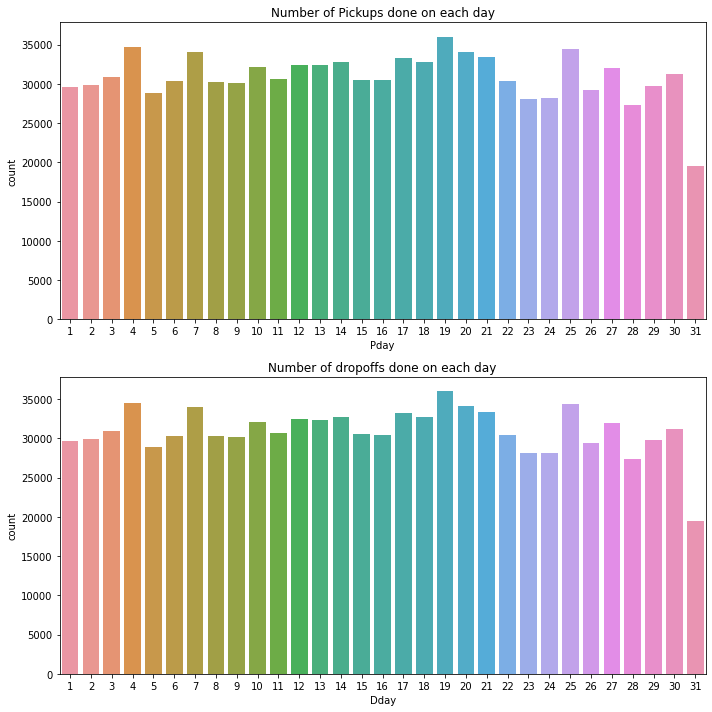

In [25]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='Pday',data=data,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day')
sns.countplot(x='Dday',data=data,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day')
plt.tight_layout()

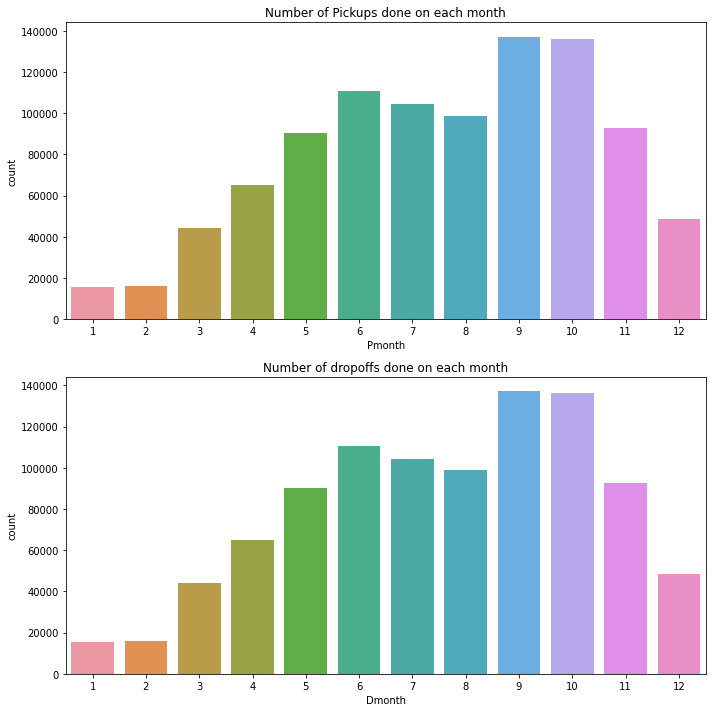

In [28]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='Pmonth',data=data,ax=ax[0])
ax[0].set_title('Number of Pickups done on each month')
sns.countplot(x='Dmonth',data=data,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each month')
plt.tight_layout()


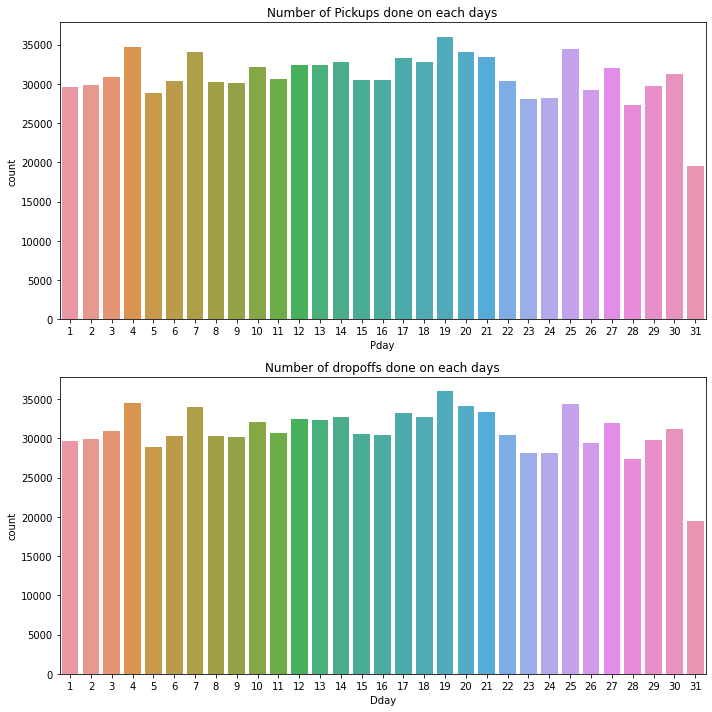

In [29]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='Pday',data=data,ax=ax[0])
ax[0].set_title('Number of Pickups done on each days')
sns.countplot(x='Dday',data=data,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each days')
plt.tight_layout()


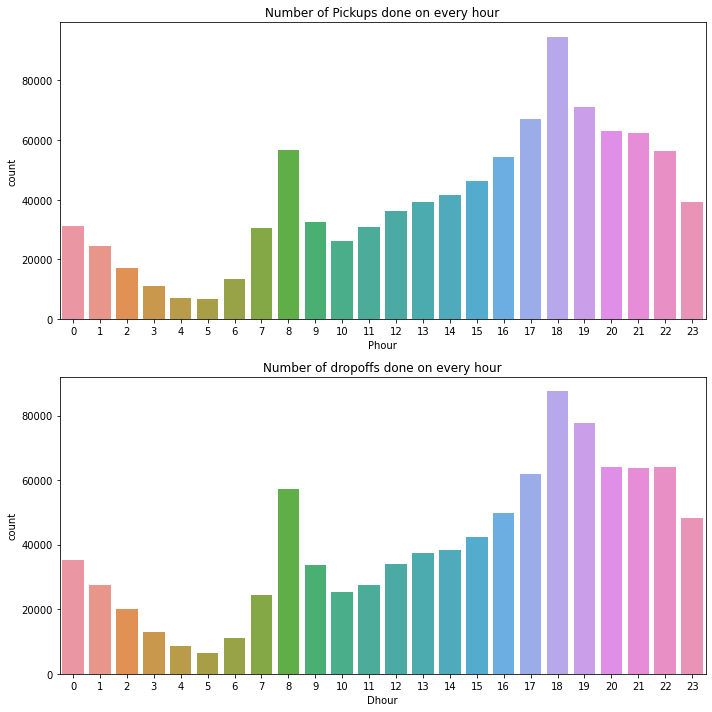

In [31]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='Phour',data=data,ax=ax[0])
ax[0].set_title('Number of Pickups done on every hour')
sns.countplot(x='Dhour',data=data,ax=ax[1])
ax[1].set_title('Number of dropoffs done on every hour')
plt.tight_layout()


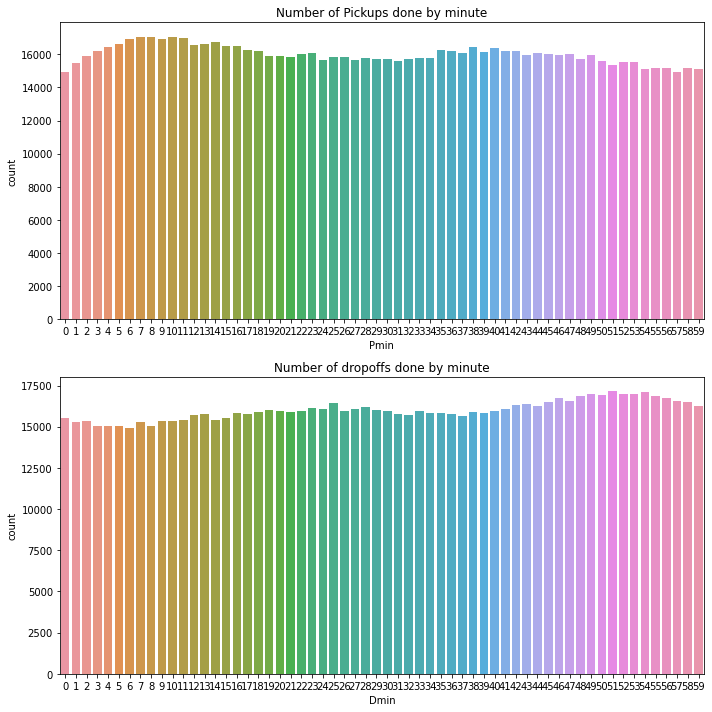

In [32]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='Pmin',data=data,ax=ax[0])
ax[0].set_title('Number of Pickups done by minute')
sns.countplot(x='Dmin',data=data,ax=ax[1])
ax[1].set_title('Number of dropoffs done by minute')
plt.tight_layout()


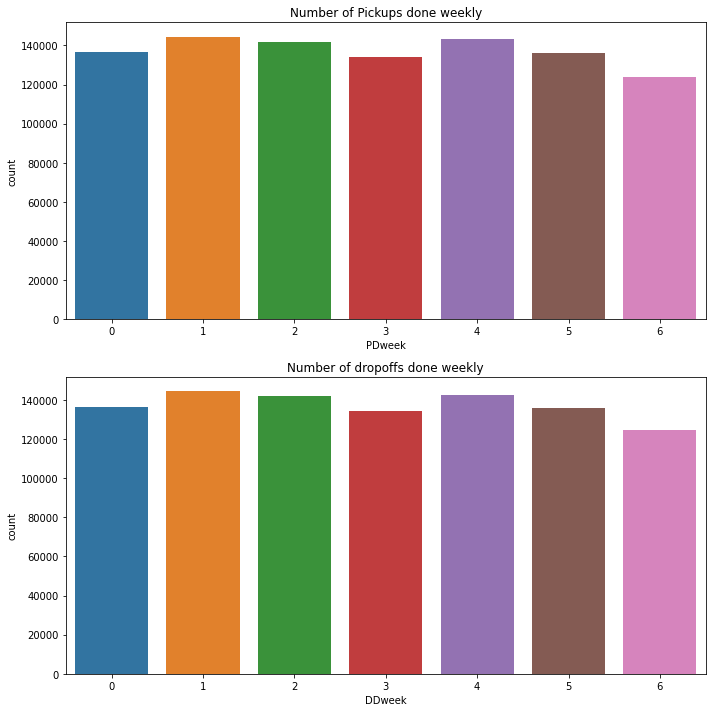

In [33]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='PDweek',data=data,ax=ax[0])
ax[0].set_title('Number of Pickups done weekly')
sns.countplot(x='DDweek',data=data,ax=ax[1])
ax[1].set_title('Number of dropoffs done weekly')
plt.tight_layout()


In [34]:
data.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

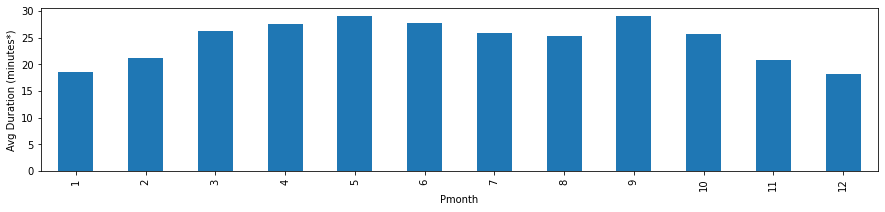

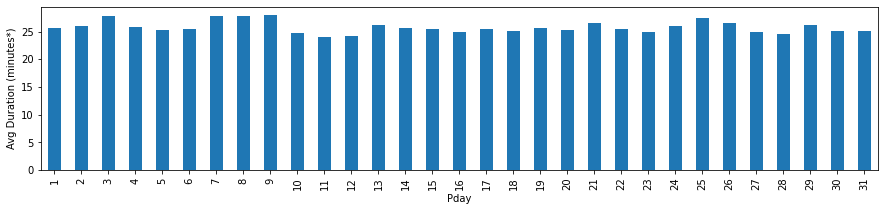

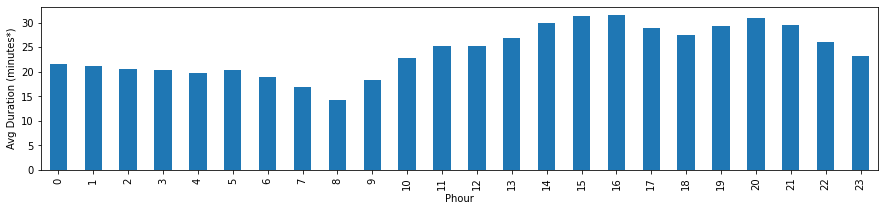

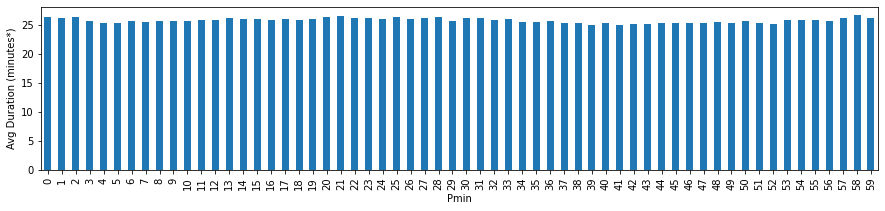

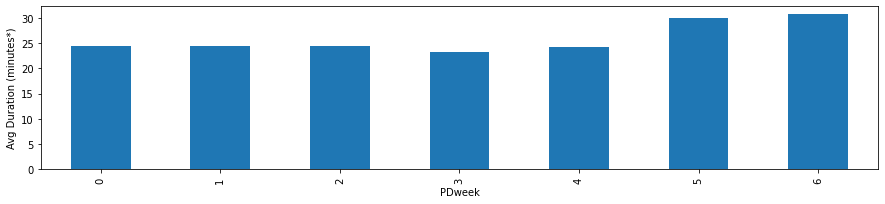

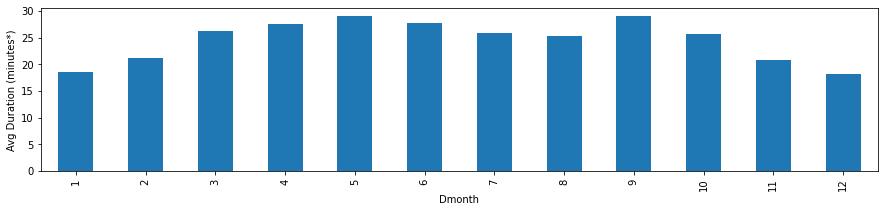

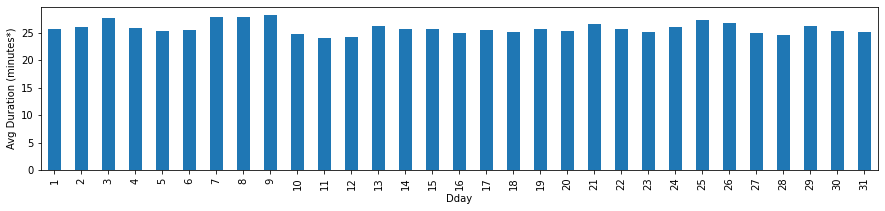

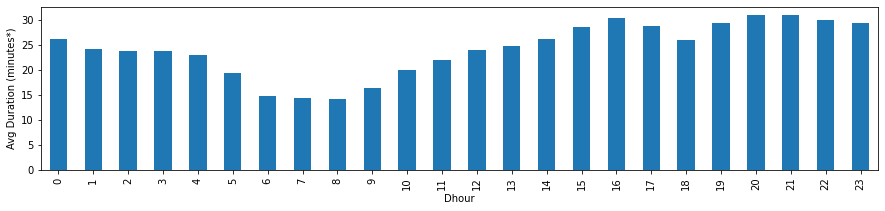

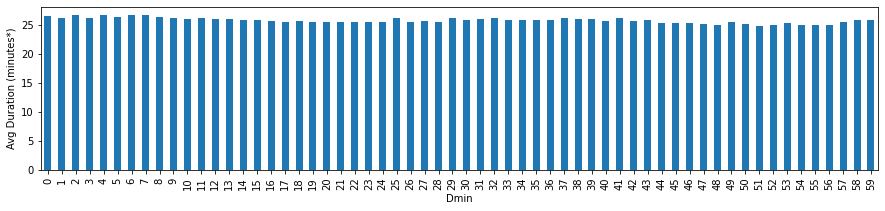

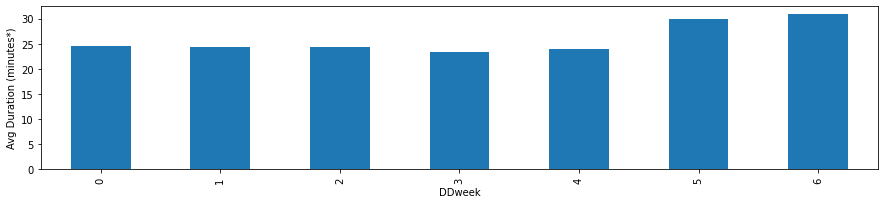

In [35]:
for x in data.columns[7:17]:
    avg_duration = data[[x,'Duration']].groupby(x, as_index = False).mean().rename(columns={'Duration':'average_duration monthly'})
    plt1 = avg_duration.plot(x = x, kind='bar',legend = False, sort_columns = True, figsize = (15,3))
    plt1.set_xlabel(x)
    plt1.set_ylabel("Avg Duration (minutes*)")
    #xticks(rotation = 90)
    plt.show()

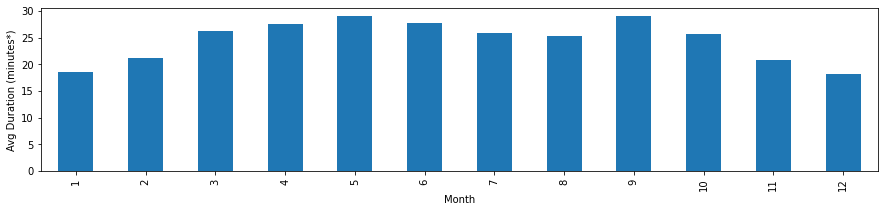

In [36]:
avg_duration = data[['Pmonth','Duration']].groupby("Pmonth", as_index = False).mean().rename(columns={'Duration':'average_duration monthly'})
plt1 = avg_duration.plot(x = 'Pmonth', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Month")
plt1.set_ylabel("Avg Duration (minutes*)")
#xticks(rotation = 90)
plt.show()

In [37]:
for col in data.columns:
    print(col, ':', len(data[col].unique()), ' labels')

Duration : 119  labels
Distance : 3303  labels
PLong : 1493  labels
PLatd : 1500  labels
DLong : 1491  labels
DLatd : 1498  labels
Haversine : 108036  labels
Pmonth : 12  labels
Pday : 31  labels
Phour : 24  labels
Pmin : 60  labels
PDweek : 7  labels
Dmonth : 12  labels
Dday : 31  labels
Dhour : 24  labels
Dmin : 60  labels
DDweek : 7  labels
Temp : 547  labels
Precip : 56  labels
Wind : 65  labels
Humid : 89  labels
Solar : 345  labels
Snow : 42  labels
GroundTemp : 700  labels
Dust : 163  labels


In [38]:
data.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

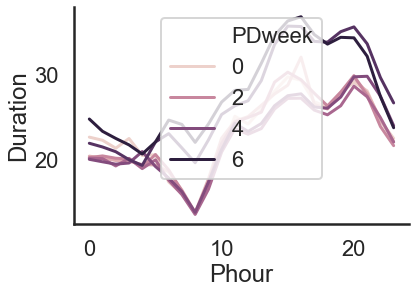

In [39]:
summary_hour_duration = pd.DataFrame(data.groupby(['PDweek','Phour'])['Duration'].mean())
summary_hour_duration.reset_index(inplace = True)
sns.set(style="white", palette="muted", color_codes=False)
sns.set_context("poster")
sns.lineplot(data=summary_hour_duration, x="Phour",hue="PDweek" , y="Duration")
sns.despine(bottom = False)

<AxesSubplot:xlabel='Phour', ylabel='Duration'>

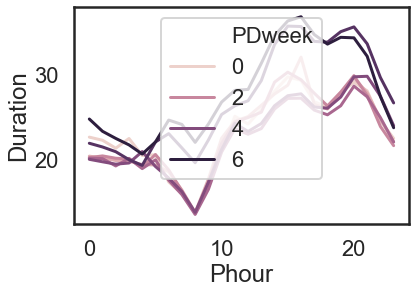

In [40]:
sns.lineplot(data=summary_hour_duration, x="Phour", hue="PDweek", y="Duration")


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\pc\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\pc\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\pc\Anaconda3\lib\site-packages\pandas\plotting\_mat

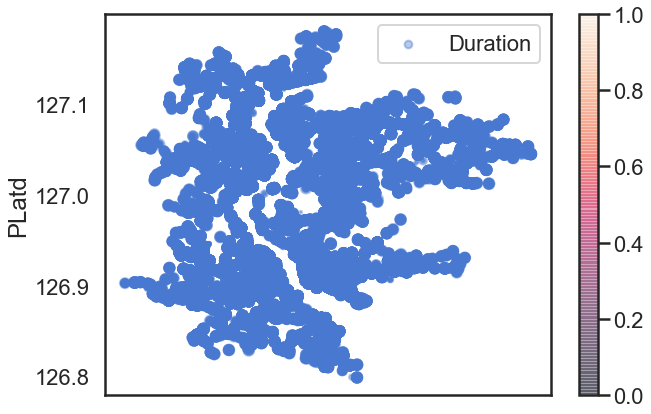

In [41]:
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
data.plot(kind="scatter", x="PLong", y="PLatd",
    s=data['Duration'], label="Duration",
    cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
#plt.legend()
#save_fig("housing_prices_scatterplot")
plt.show()